In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer

!pip install imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [2]:
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix, classification_report

In [5]:
df = pd.read_csv("F:\\Project\\NLP\\review.csv")
df = df.drop(["Unnamed: 0"], axis = 1)

In [6]:
tfidf = TfidfVectorizer(max_features=3000,
                       ngram_range=(1,3))
# TFIDF for X-train
review_tfidf= tfidf.fit_transform(df['lemma_str'])


In [7]:
X = review_tfidf
y = df['Affin_sentiment']

stregegy = 0.8

# initializing of SMOTEN Sampling
over = SMOTE(sampling_strategy= stregegy,random_state=7)

In [8]:
X_over, y_over = over.fit_resample(X, y)

## Split the Data into Train and Test

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X_over, y_over,random_state=7,test_size=0.20,stratify=y_over)

In [10]:
print("X_train = {}".format(X_train.shape))
print("X_test = {}".format(X_test.shape))
print("y_train = {}".format(y_train.shape))
print("y_test = {}".format(y_test.shape))

X_train = (27388, 3000)
X_test = (6848, 3000)
y_train = (27388,)
y_test = (6848,)


## SVC

In [11]:
clf = SVC()
#fit
clf.fit(X_train,y_train)
#model score in 3 digit after decimal
print('Model Score: %.3f' % clf.score(X_test,y_test))

Model Score: 0.994


In [12]:
poly_clf= SVC(kernel='poly', C= 10, degree=2, gamma=10)
poly_clf.fit(X_train, y_train)

y_pred= poly_clf.predict(X_test)
acc= accuracy_score(y_test, y_pred)
print('Accuracy :', acc)
confusion_matrix(y_test, y_pred)

Accuracy : 0.993428738317757


array([[3042,    2],
       [  43, 3761]], dtype=int64)

Accuracy for Train set 0.9998539506353147
Accuracy for Test set 0.9944509345794392
Fi Score 0.9998685680488926
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3044
           1       1.00      0.99      1.00      3804

    accuracy                           0.99      6848
   macro avg       0.99      0.99      0.99      6848
weighted avg       0.99      0.99      0.99      6848



C:\Users\Shriprada\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


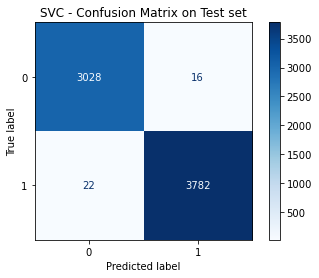

In [34]:
model_metric(X_train, X_test, y_train, y_test, clf,
                'SVC')

In [39]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(poly_clf, open(filename, 'wb'))

In [40]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.993428738317757


## Naive Bayes

In [13]:
from sklearn import metrics


M_model = MultinomialNB()
train_pred_multi = M_model.fit(X_train, y_train).predict(X_train)
test_pred_multi = M_model.fit(X_test, y_test).predict(X_test)

In [14]:
train_acc_multi = np.mean(train_pred_multi == y_train)
train_acc_multi

0.9263546078574558

In [15]:
test_acc_multi = np.mean(test_pred_multi== y_test)
test_acc_multi

0.920998831775701

Accuracy for Train set 0.9219731269168979
Accuracy for Test set 0.920998831775701
Fi Score 0.927845494141878
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      3044
           1       0.95      0.91      0.93      3804

    accuracy                           0.92      6848
   macro avg       0.92      0.92      0.92      6848
weighted avg       0.92      0.92      0.92      6848



C:\Users\Shriprada\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


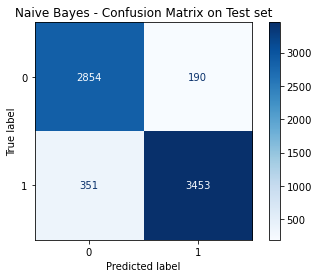

In [35]:
model_metric(X_train, X_test, y_train, y_test, M_model,
                'Naive Bayes')

## Logistic Regression

In [16]:
def model_metric(X_train, X_test, y_train, y_test, model, name):

    # predicted for X_train and X_test
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)

    # Accuracy
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)

    # F1score
    f1_score = metrics.f1_score(y_train, predict_train)

    print('Accuracy for Train set {}'.format(accuracy_train))
    print('Accuracy for Test set {}'.format(accuracy_test))
    print('Fi Score {}'.format(f1_score))
    
    print(classification_report(y_test, predict_test))

    plot_confusion_matrix(estimator=model,
                          X=X_test,
                          y_true=y_test,
                          cmap='Blues')
    plt.grid(False)
    plt.title('{} - Confusion Matrix on Test set'.format(name))

Accuracy for Train set 0.9914195998247408
Accuracy for Test set 0.9799941588785047
Fi Score 0.9922203462773529
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3044
           1       1.00      0.97      0.98      3804

    accuracy                           0.98      6848
   macro avg       0.98      0.98      0.98      6848
weighted avg       0.98      0.98      0.98      6848



C:\Users\Shriprada\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


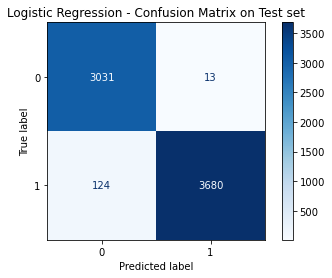

In [17]:
name = 'Logistic Regression'
model_lr = LogisticRegression(C=5, penalty='l2', random_state=7)
model_lr.fit(X_train, y_train)

model_metric(X_train, X_test, y_train, y_test, model_lr,
                'Logistic Regression')

## Bernoulli

In [20]:
from sklearn.naive_bayes import BernoulliNB
BNBclf = BernoulliNB()
BNBclf.fit(X_train, y_train)

print('Model Score: %.3f' % BNBclf.score(X_test,y_test))

Model Score: 0.839


Accuracy for Train set 0.8381407915875566
Accuracy for Test set 0.8387850467289719
Fi Score 0.8613777791675786
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      3044
           1       0.82      0.90      0.86      3804

    accuracy                           0.84      6848
   macro avg       0.84      0.83      0.83      6848
weighted avg       0.84      0.84      0.84      6848



C:\Users\Shriprada\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


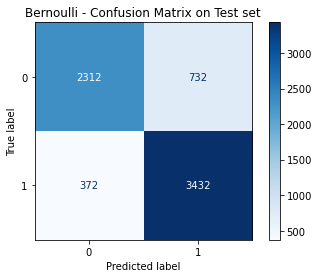

In [36]:
model_metric(X_train, X_test, y_train, y_test, BNBclf,
                'Bernoulli')

## Multinomial

In [29]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
print('Model Score: %.3f' % mnb.score(X_test,y_test))

Model Score: 0.918


Accuracy for Train set 0.9263546078574558
Accuracy for Test set 0.9177862149532711
Fi Score 0.9326071703030505
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      3044
           1       0.94      0.91      0.92      3804

    accuracy                           0.92      6848
   macro avg       0.92      0.92      0.92      6848
weighted avg       0.92      0.92      0.92      6848



C:\Users\Shriprada\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


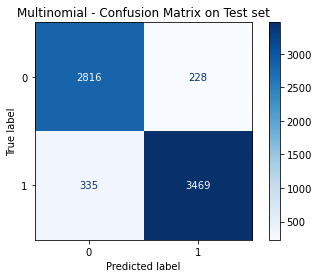

In [37]:
model_metric(X_train, X_test, y_train, y_test, mnb,
                'Multinomial')